In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from IPython import display

This notebook averages all the accuracy files saved as csv files and then visualize them for the final visual results 

In [2]:
def read_accuracy(data,acc):  #averaging 5 accuracy files and return averaged list of each sampling
    cols=[2,3,4,5,6,7]
    df1=pd.read_csv(data+'_'+acc+'_111.csv',usecols=cols)
    df2=pd.read_csv(data+'_'+acc+'_222.csv',usecols=cols)
    df3=pd.read_csv(data+'_'+acc+'_333.csv',usecols=cols)
    df4=pd.read_csv(data+'_'+acc+'_444.csv',usecols=cols)
    df5=pd.read_csv(data+'_'+acc+'_555.csv',usecols=cols)
    
    df=(df1+df2+df3+df4+df5)/5.0 #averaging
    
    random_results=df.loc[0, :].values.tolist()
    uncertainty_results=df.loc[1, :].values.tolist()
    dropout_results=df.loc[2, :].values.tolist()
    coreset_results=df.loc[3, :].values.tolist()
    
    return random_results, uncertainty_results, dropout_results, coreset_results

def read_sample(data): #averaging the sample analysis dataframes
    df1=pd.read_csv(data+'_sampleacc_111.csv',index_col='AL')
    df2=pd.read_csv(data+'_sampleacc_222.csv',index_col='AL')
    df3=pd.read_csv(data+'_sampleacc_333.csv',index_col='AL')
    df4=pd.read_csv(data+'_sampleacc_444.csv',index_col='AL')
    df5=pd.read_csv(data+'_sampleacc_555.csv',index_col='AL')
    df=(df1+df2+df3+df4+df5)/5.0 #averaging
    df.rename({'Diversity-jaccard': 'Diversity-I','Diversity-distance': 'Diversity-F'}, axis=1, inplace=True)
    df.drop(['Unnamed: 0'], axis=1,inplace=True)
    
    return df

def graph(random_results, uncertainty_results, dropout_results, coreset_results,name,acc): #drawing a graph
    len_num=len(random_results)
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 7))
        #plt.title('Accuracy of the classifier during the active learning')
        plt.plot(np.arange(len_num), random_results, label="Random",linestyle='dashed')
        plt.scatter(np.arange(len_num), random_results)
        plt.plot(np.arange(len_num), uncertainty_results, label="Uncertainty")
        plt.scatter(np.arange(len_num), uncertainty_results,marker="*")
        plt.plot(np.arange(len_num), dropout_results, label="Dropout")
        plt.scatter(np.arange(len_num), dropout_results,marker="s")
        plt.plot(np.arange(len_num), coreset_results, label="Core-Set")
        plt.scatter(np.arange(len_num), coreset_results,marker="^")

        plt.xlabel('Train size')
        plt.ylabel('Accuracy')   ##metrics
        plt.legend(loc="lower right") 
        labels = [100,200,300,400,500,600]
        plt.xticks(range(0,len_num),labels)
    
        ##saving the plot
        plt.savefig(name+"_"+acc+".png", bbox_inches='tight')
        plt.show()

def max_val(random_results, uncertainty_results, dropout_results, coreset_results):  #return the maximum accuracy per sampling
    print("Random: {0}, Uncertainty: {1}, Dropout: {2}, Core-set: {3}".format(max(random_results), max(uncertainty_results), max(dropout_results), max(coreset_results)))
    
def read_accuracy_base(data): #reading the accuracy files from the base models -Logistic regression and LSTM
    path = '/vol/fob-vol7/nebenf21/rohjehyu/BaseAcc/'
    cols=[2,3,4,5,6,7]
    df1=pd.read_csv(path+data+'_accuracy_111.csv',usecols=cols)
    df2=pd.read_csv(path+data+'_accuracy_222.csv',usecols=cols)
    df3=pd.read_csv(path+data+'_accuracy_333.csv',usecols=cols)
    df4=pd.read_csv(path+data+'_accuracy_444.csv',usecols=cols)
    df5=pd.read_csv(path+data+'_accuracy_555.csv',usecols=cols)
    
    df=(df1+df2+df3+df4+df5)/5.0
    lr_random=df.loc[0, :].values.tolist()
    lr_uncertainty=df.loc[1, :].values.tolist()
    lstm_random=df.loc[2, :].values.tolist()
    lstm_uncertainty=df.loc[3, :].values.tolist()
    
    return lr_random,lr_uncertainty,lstm_random,lstm_uncertainty


#maximum accuracy from each sampling& model
def max_val2(lr_random,lr_uncertainty,lstm_random,lstm_uncertainty,random_results, uncertainty_results): 
    print("LR_Random: {0}, LR_Uncertainty: {1},\nLSTM_Random: {2}, LSTM_Uncertainty: {3},\nBERT_Random: {4}, BERT_Uncertainty : {5}".format(max(lr_random), max(lr_uncertainty), max(lstm_random), max(lstm_uncertainty),max(random_results), max(uncertainty_results)))

#drawing the graph of results from baseline models and BERT
def graph_base(lr_random,lr_uncertainty,lstm_random,lstm_uncertainty,bert_random,bert_uncertainty,name):
    len_num=len(lr_random)
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 7))
        #plt.title('Accuracy of the classifier during the active learning')
        plt.plot(np.arange(len_num), lr_random, label="Logistic Regression Random",linestyle='dashed')
        plt.scatter(np.arange(len_num), lr_random)
        plt.plot(np.arange(len_num), lr_uncertainty, label="Logistic Regression Uncertainty")
        plt.scatter(np.arange(len_num), lr_uncertainty,marker="^")

        plt.plot(np.arange(len_num), lstm_random, label="LSTM Random",linestyle='dashed')
        plt.scatter(np.arange(len_num), lstm_random)
        plt.plot(np.arange(len_num), lstm_uncertainty, label="LSTM Uncertainty")
        plt.scatter(np.arange(len_num), lstm_uncertainty,marker="^")
    
        plt.plot(np.arange(len_num), bert_random, label="BERT Random",linestyle='dashed')
        plt.scatter(np.arange(len_num), bert_random)
        plt.plot(np.arange(len_num), bert_uncertainty, label="BERT Uncertainty")
        plt.scatter(np.arange(len_num), bert_uncertainty,marker="^")
    
    
        plt.xlabel('Train size')
        plt.ylabel('Accuracy')
        plt.legend(loc="lower right")
        labels = [100,200,300,400,500,600]
        plt.xticks(range(0,len_num),labels)
        plt.savefig(name+"_base.png", bbox_inches='tight')
        plt.show()
 


In [3]:
#define which metric to use ('acc','precision','recall','f1' were available from the output files.)
metric='acc' #accuracy

In [4]:
# Averaging 5 dataset's sample analysis results that was also averaged over 5 experiments
(read_sample('covid')+read_sample('politifact')+read_sample('cc')+read_sample('isot')+read_sample('kaggle'))/5.0

,Label Entropy,Diversity-I,Diversity-F,Representativeness,Uncertainty
AL,,,,,
random,0.000934,0.481112,0.598821,0.466865,0.013803
uncertainty,0.027867,0.483406,0.597990,0.464483,0.014041
dropout,0.011908,0.480968,0.597831,0.462900,0.013826
coreset,0.033050,0.547460,0.540448,0.512146,0.013919


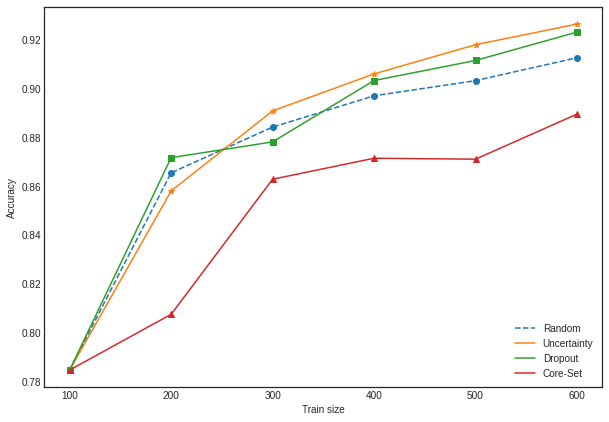

In [5]:
#COVID-19 Fake News
random_results, uncertainty_results, dropout_results, coreset_results=read_accuracy('covid',metric)
graph(random_results, uncertainty_results, dropout_results, coreset_results,'covid',metric)

In [6]:
#maximum value of each sampling
max_val(random_results, uncertainty_results, dropout_results, coreset_results)

Random: 0.9124409448818899, Uncertainty: 0.9261732283464568, Dropout: 0.9228976377952757, Core-set: 0.8893858267716535


In [7]:
read_sample('covid') #sample analysis results

,Label Entropy,Diversity-I,Diversity-F,Representativeness,Uncertainty
AL,,,,,
random,0.000479,0.304723,0.745413,0.339698,0.013636
uncertainty,0.007350,0.314856,0.741890,0.339653,0.013879
dropout,0.001733,0.314182,0.741125,0.339463,0.013717
coreset,0.066250,0.362475,0.662329,0.474993,0.012563


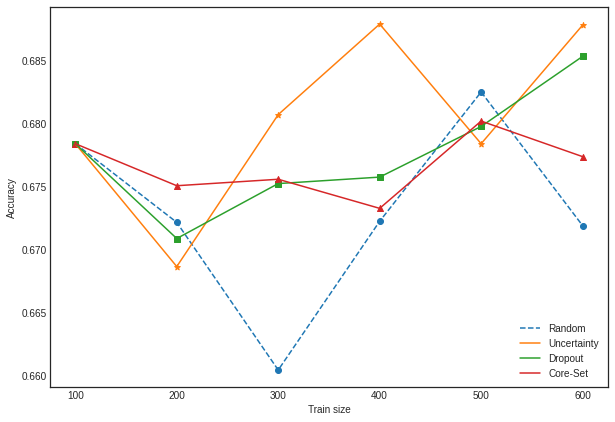

In [8]:
#PolitiFact
random_results, uncertainty_results, dropout_results, coreset_results=read_accuracy('politifact',metric)
graph(random_results, uncertainty_results, dropout_results, coreset_results,'politifact',metric)

In [9]:
max_val(random_results, uncertainty_results, dropout_results, coreset_results)

Random: 0.6825192802056556, Uncertainty: 0.6879177377892032, Dropout: 0.6853470437017994, Core-set: 0.6802056555269923


In [10]:
read_sample('politifact') #sample analysis results

,Label Entropy,Diversity-I,Diversity-F,Representativeness,Uncertainty
AL,,,,,
random,0.000748,0.346554,0.763140,0.303461,0.014741
uncertainty,0.026296,0.336447,0.765635,0.295264,0.014345
dropout,0.039364,0.330543,0.766162,0.289655,0.014297
coreset,0.019962,0.394017,0.707097,0.401358,0.014982


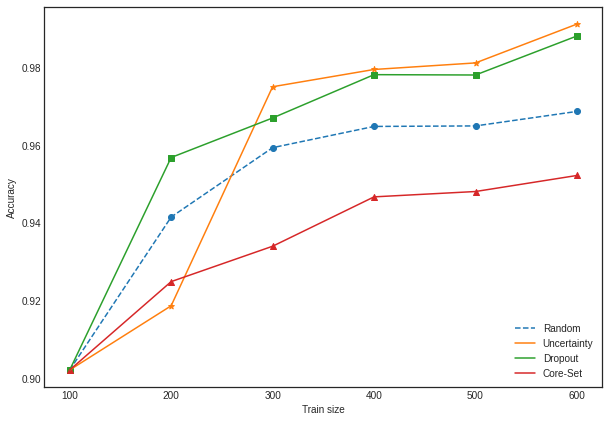

In [11]:
#ISOT
random_results, uncertainty_results, dropout_results, coreset_results=read_accuracy('isot',metric)
graph(random_results, uncertainty_results, dropout_results, coreset_results,'isot',metric)

In [12]:
max_val(random_results, uncertainty_results, dropout_results, coreset_results)

Random: 0.9686666666666668, Uncertainty: 0.9911555555555556, Dropout: 0.9880888888888888, Core-set: 0.9521777777777778


In [13]:
read_sample('isot')  #sample analysis results

,Label Entropy,Diversity-I,Diversity-F,Representativeness,Uncertainty
AL,,,,,
random,0.001200,0.543703,0.501474,0.557006,0.013521
uncertainty,0.035863,0.573581,0.501306,0.553550,0.014066
dropout,0.008395,0.569799,0.500609,0.552384,0.013724
coreset,0.002752,0.623368,0.449817,0.572652,0.013680


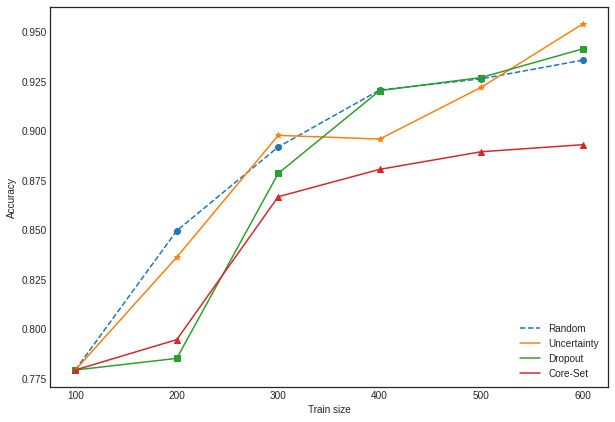

In [14]:
#Combined Corpus
random_results, uncertainty_results, dropout_results, coreset_results=read_accuracy('cc',metric)
graph(random_results, uncertainty_results, dropout_results, coreset_results,'cc',metric)

In [15]:
max_val(random_results, uncertainty_results, dropout_results, coreset_results)

Random: 0.9356444444444444, Uncertainty: 0.9538666666666668, Dropout: 0.9413333333333334, Core-set: 0.8929777777777778


In [16]:
read_sample('cc') #sample analysis results

,Label Entropy,Diversity-I,Diversity-F,Representativeness,Uncertainty
AL,,,,,
random,0.000873,0.608478,0.493809,0.571217,0.013826
uncertainty,0.003889,0.596716,0.495435,0.568472,0.013717
dropout,0.001733,0.600406,0.494222,0.567281,0.013749
coreset,0.015777,0.715898,0.439228,0.575411,0.014199


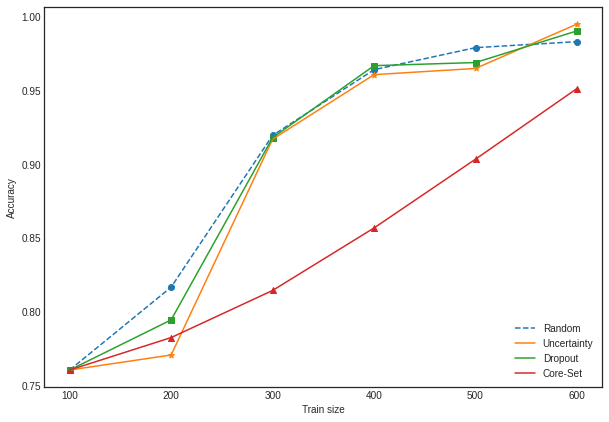

In [17]:
#Kaggle Fake News
random_results, uncertainty_results, dropout_results, coreset_results=read_accuracy('kaggle',metric)
graph(random_results, uncertainty_results, dropout_results, coreset_results,'kaggle',metric)

In [18]:
max_val(random_results, uncertainty_results, dropout_results, coreset_results)

Random: 0.9830666666666665, Uncertainty: 0.9949777777777777, Dropout: 0.9903555555555557, Core-set: 0.9512444444444444


In [19]:
read_sample('kaggle')  #sample analysis results

,Label Entropy,Diversity-I,Diversity-F,Representativeness,Uncertainty
AL,,,,,
random,0.001370,0.602102,0.490266,0.562942,0.013290
uncertainty,0.065937,0.595429,0.485684,0.565478,0.014199
dropout,0.008317,0.589909,0.487038,0.565719,0.013640
coreset,0.060509,0.641544,0.443766,0.536316,0.014169


Base models(Logistic Regression, LSTM) + BERT results graphs

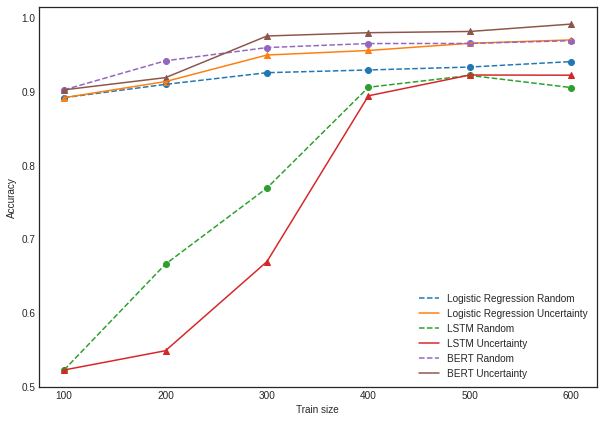

In [20]:
#ISOT
lr_random,lr_uncertainty,lstm_random,lstm_uncertainty=read_accuracy_base('isot')
random_results, uncertainty_results, dropout_results, coreset_results=read_accuracy('isot','acc')
graph_base(lr_random,lr_uncertainty,lstm_random,lstm_uncertainty,random_results,uncertainty_results,'isot')

In [21]:
max_val2(lr_random,lr_uncertainty,lstm_random,lstm_uncertainty,random_results, uncertainty_results)

LR_Random: 0.9403555555555556, LR_Uncertainty: 0.9697333333333333,
LSTM_Random: 0.9216000000000001, LSTM_Uncertainty: 0.9221777777777778,
BERT_Random: 0.9686666666666668, BERT_Uncertainty : 0.9911555555555556


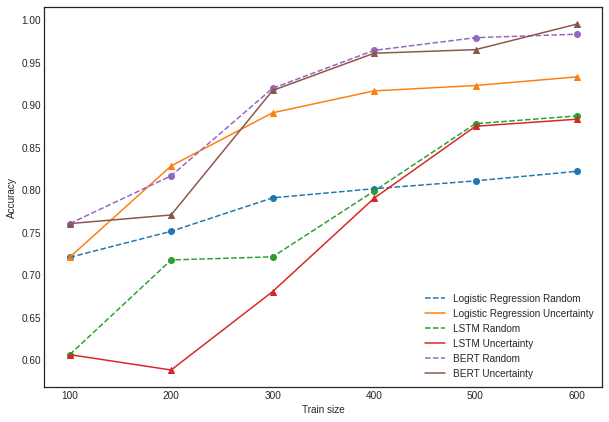

In [22]:
#Kaggle Fake News
lr_random,lr_uncertainty,lstm_random,lstm_uncertainty=read_accuracy_base('kaggle')
random_results, uncertainty_results, dropout_results, coreset_results=read_accuracy('kaggle','acc')
graph_base(lr_random,lr_uncertainty,lstm_random,lstm_uncertainty,random_results,uncertainty_results,'kaggle')

In [23]:
max_val2(lr_random,lr_uncertainty,lstm_random,lstm_uncertainty,random_results, uncertainty_results)

LR_Random: 0.8218222222222222, LR_Uncertainty: 0.9328888888888889,
LSTM_Random: 0.8869777777777778, LSTM_Uncertainty: 0.8831111111111112,
BERT_Random: 0.9830666666666665, BERT_Uncertainty : 0.9949777777777777


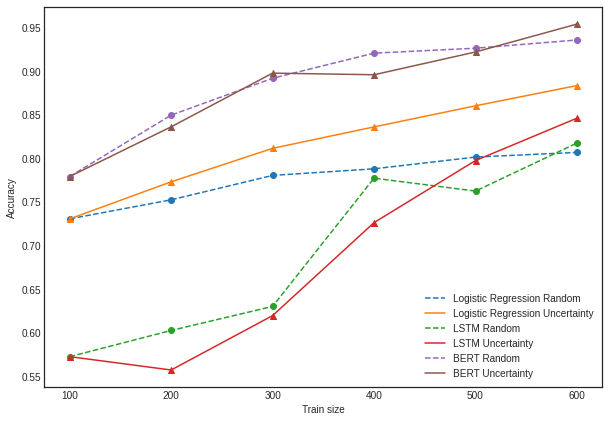

In [24]:
#Combined Corpus
lr_random,lr_uncertainty,lstm_random,lstm_uncertainty=read_accuracy_base('cc')
random_results, uncertainty_results, dropout_results, coreset_results=read_accuracy('cc','acc')
graph_base(lr_random,lr_uncertainty,lstm_random,lstm_uncertainty,random_results,uncertainty_results,'cc')

In [25]:
max_val2(lr_random,lr_uncertainty,lstm_random,lstm_uncertainty,random_results, uncertainty_results)

LR_Random: 0.8068888888888889, LR_Uncertainty: 0.8834222222222223,
LSTM_Random: 0.8176, LSTM_Uncertainty: 0.8460888888888889,
BERT_Random: 0.9356444444444444, BERT_Uncertainty : 0.9538666666666668


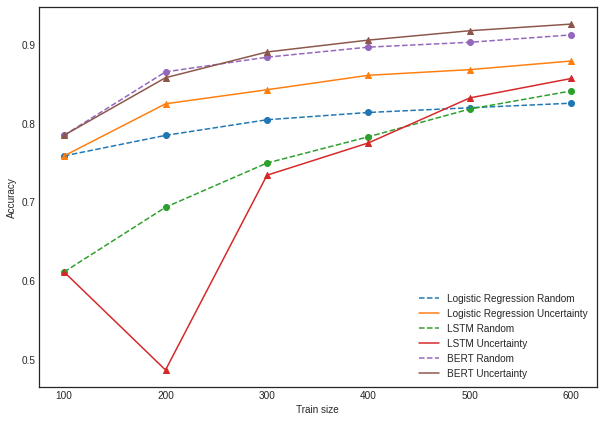

In [26]:
#Covid-19 Fake News
lr_random,lr_uncertainty,lstm_random,lstm_uncertainty=read_accuracy_base('covid')
random_results, uncertainty_results, dropout_results, coreset_results=read_accuracy('covid','acc')
graph_base(lr_random,lr_uncertainty,lstm_random,lstm_uncertainty,random_results,uncertainty_results,'covid')

In [27]:
max_val2(lr_random,lr_uncertainty,lstm_random,lstm_uncertainty,random_results, uncertainty_results)

LR_Random: 0.8256377952755904, LR_Uncertainty: 0.879244094488189,
LSTM_Random: 0.8412598425196849, LSTM_Uncertainty: 0.8570708661417322,
BERT_Random: 0.9124409448818899, BERT_Uncertainty : 0.9261732283464568


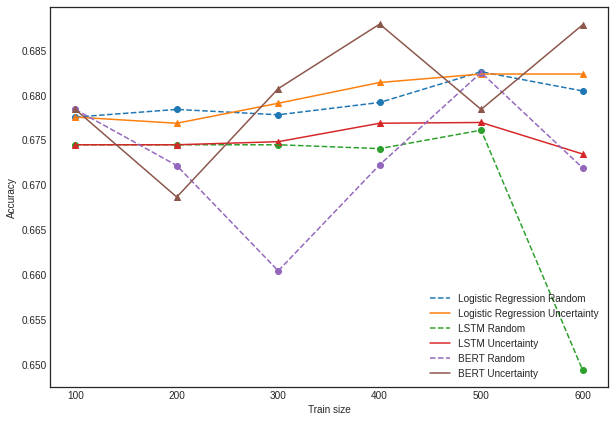

In [8]:
#PolitiFact
lr_random,lr_uncertainty,lstm_random,lstm_uncertainty=read_accuracy_base('politifact')
random_results, uncertainty_results, dropout_results, coreset_results=read_accuracy('politifact','acc')
graph_base(lr_random,lr_uncertainty,lstm_random,lstm_uncertainty,random_results,uncertainty_results,'politifact')

In [9]:
max_val2(lr_random,lr_uncertainty,lstm_random,lstm_uncertainty,random_results, uncertainty_results)

LR_Random: 0.682604970008569, LR_Uncertainty: 0.6823479005998285,
LSTM_Random: 0.6760925449871464, LSTM_Uncertainty: 0.676949443016281,
BERT_Random: 0.6825192802056556, BERT_Uncertainty : 0.6879177377892032
